In [1]:
import pandas as pd

## 1. Loading Data

In [31]:
adult = pd.read_csv('adult.csv')







## 2. Observing Data

In [3]:
#to see column names, and if numuerical data, use describe
adult.columns
#adult.describe()
#adult.values

Index(['Age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [4]:
#To see number of rows and columns
adult.shape

(32561, 15)

In [5]:
#To see top 5 and bottom 5 rows
adult.head()
adult.tail() 
#mydata.iloc[1700:1705,:] # to see specific rows

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## 3. Cleaning Data

## 3.1 Remove Unwanted Rows

In [6]:
#Removing unnessary columns fnlwgt and education
mydata = adult.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,13,14]]
mydata
#adult.drop(['fnlwgt', 'education'])  #had to use same variable

,Age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 3.2 Look for Null Values

In [7]:
#look for missing values in any column. isnull or notnull
mydata.isnull().any()
#mydata["Age"].fillna("No Gender", inplace = True)  
#mydata.isnull().sum()  # to see count

Age               False
workclass         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [8]:
#To see rows where there are missing values in Age Column
mydata[pd.isnull(mydata['Age'])]

,Age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [9]:
#To check for existance of a value in any column
if ' United-States' in mydata.values:
    print ('exists')
#if 39 in mydata.values:
#if ' ?' in mydata.values:
#   print ('exists')

exists


In [10]:
#condition to see Divorced Employees
mydata.loc[mydata['marital-status']==' Divorced']
#mydata[mydata.workclass==' ?']
#mydata[mydata.marital-status==' ?']  # this is error as column name has '-' can't use it direcly with '.'

,Age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
19,43,Self-emp-not-inc,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
24,59,Private,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
28,39,Private,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
32,45,Private,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32543,45,Local-gov,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32544,31,Private,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32546,37,Private,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K


## 3.3 Removing '?' Rows

In [11]:
#to see colums where there is ' ?'
for each_column in mydata.columns:
    if ' ?' in mydata[each_column].values:
        print (each_column)

workclass
occupation
native-country


C:\Users\varshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
#checking data and count of these rows
mydata.loc[mydata['workclass']==' ?'].shape  #1836
mydata.loc[mydata['occupation']==' ?'].shape  #1843
mydata.loc[mydata['native-country']==' ?'].shape  #583
mydata[mydata.workclass==' ?'].shape

(1836, 13)

In [13]:
#Removing ' ?' from each column
final_data=mydata[mydata.workclass!=' ?']
final_data=final_data[final_data.occupation!=' ?']
#rename the marital-status column as it has '-'. With '-' df.column won't work
final_data.rename(columns={'marital-status':'marital_status'},inplace=True)  #inplace updates same object
final_data=final_data[final_data.marital_status!=' ?']
final_data.shape

(30718, 13)

## 3.4 Transform data from charcter to numeric

In [14]:
from sklearn.preprocessing import LabelEncoder

In [20]:
#we transform income variable
final_data['income']=LabelEncoder().fit_transform(final_data['income'])
final_data['income']
final_data['workclass']=LabelEncoder().fit_transform(final_data['workclass'])
final_data['marital_status']=LabelEncoder().fit_transform(final_data['marital_status'])
final_data['occupation']=LabelEncoder().fit_transform(final_data['occupation'])
final_data['relationship']=LabelEncoder().fit_transform(final_data['relationship'])
final_data['race']=LabelEncoder().fit_transform(final_data['race'])
final_data['sex']=LabelEncoder().fit_transform(final_data['sex'])
final_data['native-country']=LabelEncoder().fit_transform(final_data['native-country'])

## 4. Splitting Train and Test Data

In [26]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

x= final_data.iloc[:,:-1]
y=final_data.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


## 5. Binary Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

C:\Users\varshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4311  274]
 [ 867  692]]
Accuracy: 0.8142903645833334


<function matplotlib.pyplot.show(*args, **kw)>

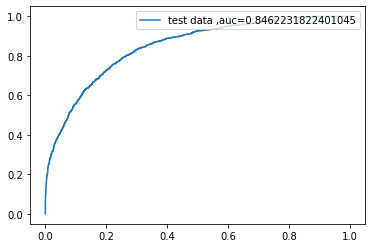

In [30]:
import matplotlib.pyplot as plt

y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="test data ,auc="+str(auc))
plt.legend(loc=1)
plt.show

## 6. NaiveBaye Model

In [32]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#create a Gaussian classifier
gnb = GaussianNB()

gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print('Accuracy thru Gaussian Naive Bayes ', metrics.accuracy_score(y_test, y_pred))

Accuracy thru Gaussian Naive Bayes  0.7859700520833334


<function matplotlib.pyplot.show(*args, **kw)>

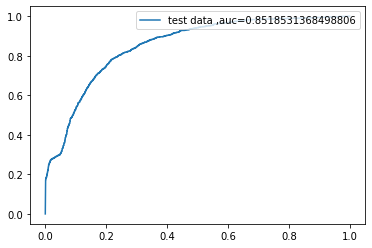

In [33]:
import matplotlib.pyplot as plt

y_pred_proba = gnb.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="test data ,auc="+str(auc))
plt.legend(loc=1)
plt.show